## Grant's Notebook
## Research question/interests
The popularity of a programming language to the programmer's salary and if certain languages generally complement eachother in industry? Are niche languages paid more? What's the most popular poorly paid programming language? As well as trends over the survey, if certain languages are becoming more popular and others fading.

In [1]:
import project_functions1 as p1
import pandas as pd # for analysis and loading in csv
df2021 = pd.read_csv('../data/raw/survey_results_public_2021.csv')

In [2]:
df2021.head() # The first five rows of the 2021 dataframe. The other four are similar and for readability not showing

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
df2021.tail() # A look at the last five rows.

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


# Load in file unprocessed

In [4]:
import project_functions1 as p1
df2021U = p1.unprocessed('../data/raw/survey_results_public_2021.csv')
df2021U

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


## Milestone 3 
### Exploratory Data Analysis
### Task 1 Visuals are Below Task 2 and Task 3
I need the visuals on the processed data. I had to parse a column to separate the programming languages and get their count. I did this after doing some non visual analysis on the dataset before visualizing the columns that seemed important for my questions.

In [5]:
import numpy as np # also for analysis
import seaborn as sns # for visual analysis
import matplotlib.pyplot as plt #for visual analysis

#### Beginning analysis

Analysis is on the unprocessed data of 2021. Would be similar for the other four years. After the initial look will clean the data depending on what is found.

In [6]:
print(f"Number of rows and Columns: {df2021U.shape}") 

Number of rows and Columns: (83439, 48)


In [7]:
#Noticing many that will not be necessary for my research questions
print(f"Column names in the dataframe: {df2021U.columns}") 

Column names in the dataframe: Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')


In [8]:
df2021U.info() #non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [9]:
df2021U.isnull().sum() # How many missing values in each column.

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

------------------------
Visualizing the null values where the light color indicates a null value. Columns such as US_State show a large amount of null values.

<AxesSubplot:>

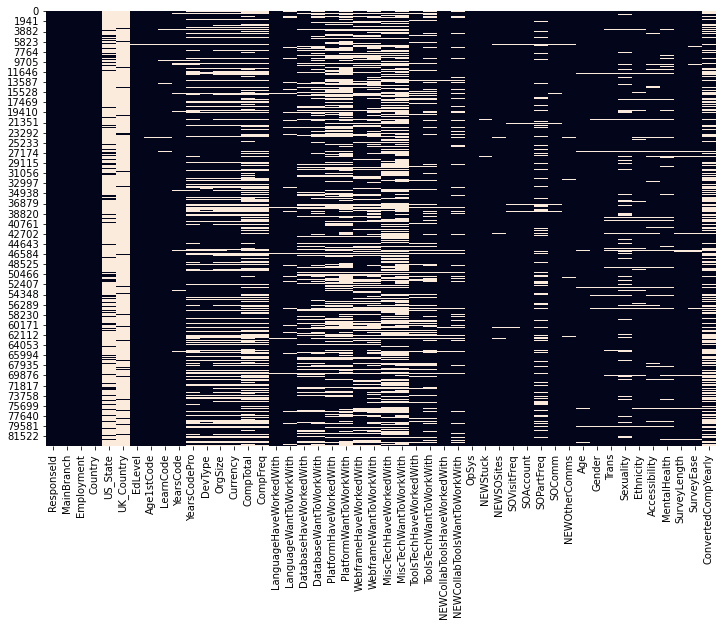

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df2021U.isnull(),cbar=False)

In [11]:
#Seeing the difference between YearsCode and Yearscodepro
#df2021U[df2021U['YearsCode'].apply(lambda x:x.isdigit())].set_index('YearsCode')
#df2021U[pd.to_numeric(df2021U['YearsCode'], errors='coerce').notnull()]
#df2021U[pd.to_numeric(df2021U['YearsCodePro'], errors='coerce').notnull()]

In [12]:
df2021U.groupby(['Gender']).mean().round()

,ResponseId,CompTotal,ConvertedCompYearly
Gender,,,
Man,41431.0,2.294315e+69,115584.0
"Man;Non-binary, genderqueer, or gender non-conforming",39923.0,9.708980e+05,411299.0
"Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:",43531.0,1.626000e+04,38672.0
"Man;Or, in your own words:",40862.0,3.262330e+05,84083.0
Man;Woman,38576.0,1.188500e+06,75654.0
"Man;Woman;Non-binary, genderqueer, or gender non-conforming",39224.0,2.633880e+06,87425.0
"Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:",35365.0,6.371000e+04,58975.0
"Man;Woman;Or, in your own words:",58578.0,7.500000e+06,6588.0
"Non-binary, genderqueer, or gender non-conforming",41673.0,6.633180e+05,157788.0


In [13]:
df2021U.describe().round()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.0,4.718300e+04,46844.0
mean,41720.0,2.119407e+69,118426.0
std,24087.0,4.603702e+71,527294.0
min,1.0,0.000000e+00,1.0
25%,20860.0,1.600000e+04,27025.0
50%,41720.0,6.700000e+04,56211.0
75%,62580.0,1.400000e+05,100000.0
max,83439.0,1.000000e+74,45241312.0


## Load file in and process
### Task 2 And Task 3

Apologies for the wait! I hope to find a quicker solution to load in all the data. 

Method chaining within the load_and_process function.

In [14]:
df2021P = p1.load_and_process('../data/raw/survey_results_public_2021.csv',2021)
df2020P = p1.load_and_process('../data/raw/survey_results_public_2020.csv',2020)
#Function to work with pd read and zipfiles. File format zip since the csv was too big for github.
df2019P = p1.load_and_process('../data/raw/survey_results_public_2019.csv.zip',2019) 
df2018P = p1.load_and_process('../data/raw/survey_results_public_2018.csv.zip',2018)
df2017P = p1.load_and_process('../data/raw/survey_results_public_2017.csv.zip',2017)  

#Creation of a dataframe of all five years.
pdList = [df2021P,df2020P,df2019P,df2018P,df2017P]
dfFiveYears = pd.concat(pdList)


In [15]:
print(f"Rows and columns prior to processing, {df2021U.shape} and after {df2021P.shape}")
print(f"Columns removed = {df2021U.shape[1] - df2021P.shape[1]}")

Rows and columns prior to processing, (83439, 48) and after (83439, 20)
Columns removed = 28


In [16]:
df2021P.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'EdLevel',
       'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'Currency', 'CompTotal', 'ProgrammingLanguage',
       'LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'Age', 'Gender',
       'Accessibility', 'ConvertedCompYearly'],
      dtype='object')

In [17]:
df2021P.head()

,ResponseId,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,ProgrammingLanguage,LanguageWantToWorkWith,DatabaseWantToWorkWith,Age,Gender,Accessibility,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,SQLite,25-34 years old,Man,None of the above,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,NaN,18-24 years old,Man,None of the above,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,18-24 years old,Man,None of the above,NaN
3,4,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,JavaScript;TypeScript,JavaScript;TypeScript,NaN,35-44 years old,Man,I am deaf / hard of hearing,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Cassandra;Elasticsearch;PostgreSQL;Redis,25-34 years old,Man,None of the above,NaN


## Analysis 

Analysing the programming languages column of the dataframe. Iterating through the column splitting the row into a list by the semicolon delimiter then using the counter collection to get the occurences of each language.  

In [18]:
#Uncomment to use other years of data, commented as well because it's slow to do all five plus total.
#Each is a counter object that is returned from the dfLangCount() function
#More details in the functions file but was necessary to parse the languages column.
langCount2021 = p1.dfLangCount(df2021P,'ProgrammingLanguage')
#langCount2020 = p1.dfLangCount(df2020P,'ProgrammingLanguage')
#langCount2019 = p1.dfLangCount(df2019P,'ProgrammingLanguage')
#langCount2018 = p1.dfLangCount(df2018P,'ProgrammingLanguage')
#langCount2017 = p1.dfLangCount(df2017P,'ProgrammingLanguage')
langCountAll = p1.dfLangCount(dfFiveYears,'ProgrammingLanguage')
#An example of the output of the function

#p1.countPrintLang(langCount2021,2021) #Print for the counter object numerical counts

 ---------------------------------------------------------------------------------------------------------
Next creating a data frame of languages with programming languages with salaries. Similar to the counter function. Wrote a separate function from the count since the count function is much faster than my count with salary function. So keeping them separate to keep things quicker.

In [19]:
dfLangSalary2021= p1.dfLangSalary(df2021P,langCount2021)
dfLangSalary2021.head()


index,C++,HTML/CSS,JavaScript,Objective-C,PHP,Swift,Python,Assembly,C,R,...,VBA,Groovy,Clojure,APL,LISP,F#,Elixir,Erlang,Crystal,COBOL
0,62268.0,62268.0,62268.0,62268.0,62268.0,62268.0,NaN,NaN,NaN,NaN,...,25944.0,NaN,61398.0,NaN,NaN,200000.0,59454.0,155111.0,19452.0,NaN
1,NaN,NaN,NaN,45564.0,NaN,NaN,NaN,11832.0,NaN,NaN,...,NaN,115784.0,518868.0,155111.0,58373.0,24324.0,90000.0,NaN,NaN,NaN
2,51552.0,NaN,NaN,NaN,46135.0,NaN,NaN,103000.0,77290.0,NaN,...,130000.0,69183.0,NaN,NaN,NaN,45396.0,NaN,190000.0,108098.0,18288.0
3,77290.0,NaN,NaN,21000.0,NaN,45564.0,NaN,NaN,NaN,NaN,...,71850.0,165000.0,NaN,NaN,175000.0,32429.0,175000.0,NaN,NaN,NaN
4,NaN,NaN,NaN,75492.0,NaN,NaN,51552.0,43908.0,NaN,NaN,...,14268.0,NaN,NaN,NaN,54049.0,55211.0,190000.0,134430.0,840000.0,NaN


In [20]:
topTwentyWorkedWithLangs2021 = langCount2021.most_common(20) #using counter collections method
totalLangUsers = np.sum(langCount2021.values())
print("Top twenty languages by count in 2021 ",topTwentyWorkedWithLangs2021)

Top twenty languages by count in 2021  [('JavaScript', 53587), ('HTML/CSS', 46259), ('Python', 39792), ('SQL', 38835), ('Java', 29162), ('Node.js', 27975), ('TypeScript', 24909), ('C#', 22984), ('Bash/Shell', 22385), ('C++', 20057), ('PHP', 18130), ('C', 17329), ('PowerShell', 8871), ('Go', 7879), ('Kotlin', 6866), ('Rust', 5799), ('Ruby', 5569), ('Dart', 4965), ('Assembly', 4632), ('Swift', 4204)]


In [21]:
langCount2021df = pd.DataFrame(langCount2021.items(),columns=['ProgrammingLanguage','User Count'])
langCountAlldf = pd.DataFrame(langCountAll.items(),columns=['ProgrammingLanguage','User Count'])
topTwentyCountAll = langCountAlldf.nlargest(20,"User Count")
langCount2021df['LangPercent'] = (langCount2021df["User Count"] / langCount2021df["User Count"].sum())*100 
langCount2021df = langCount2021df.fillna(0)
topTwentyLangCount2021df = langCount2021df.nlargest(20,'LangPercent')
lowTwentyLangCount2021df = langCount2021df.nsmallest(20,'LangPercent')

#langCountNewAlldf


In [22]:
round(langCount2021df[['ProgrammingLanguage','LangPercent']],2)

,ProgrammingLanguage,LangPercent
0,C++,4.53
1,HTML/CSS,10.45
2,JavaScript,12.11
3,Objective-C,0.52
4,PHP,4.10
5,Swift,0.95
6,Python,8.99
7,Assembly,1.05
8,C,3.92
9,R,0.95


## Task 1 Descriptive plots

User counts to the programming languages over 2021 and for all five years. 

Text(0.5, 15.440000000000026, 'User Count Over Five Years')

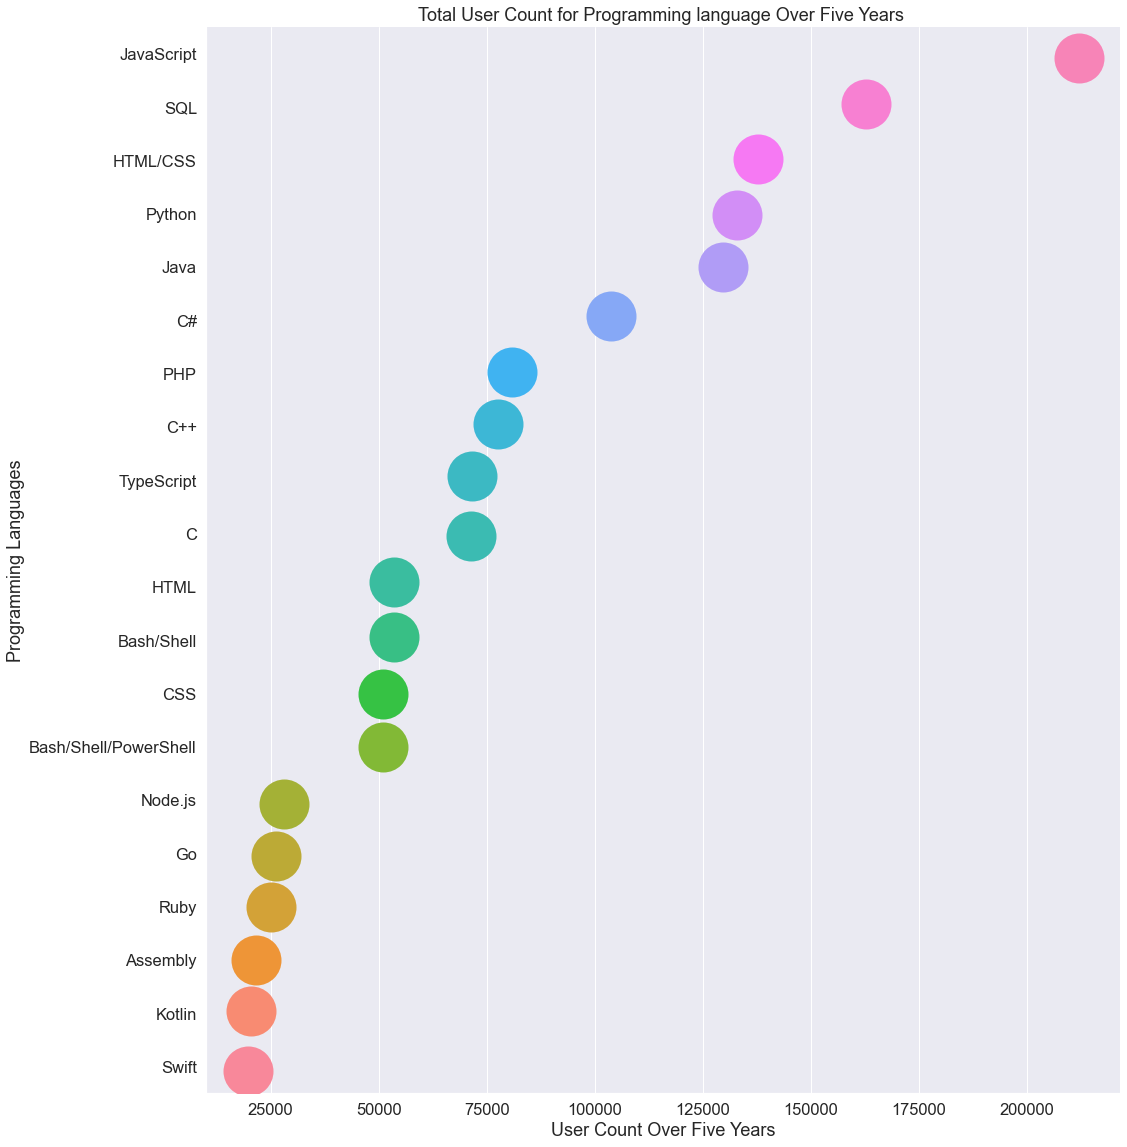

In [23]:

sns.set(font_scale = 1.5)
sns.catplot( x="User Count",y= "ProgrammingLanguage" ,orient='h',hue='User Count',data=topTwentyCountAll,height =16,s=50)
plt.title("Total User Count for Programming language Over Five Years ")
plt.ylabel("Programming Languages")
plt.xlabel("User Count Over Five Years")

Text(0, 0.5, 'Percentage of Users')

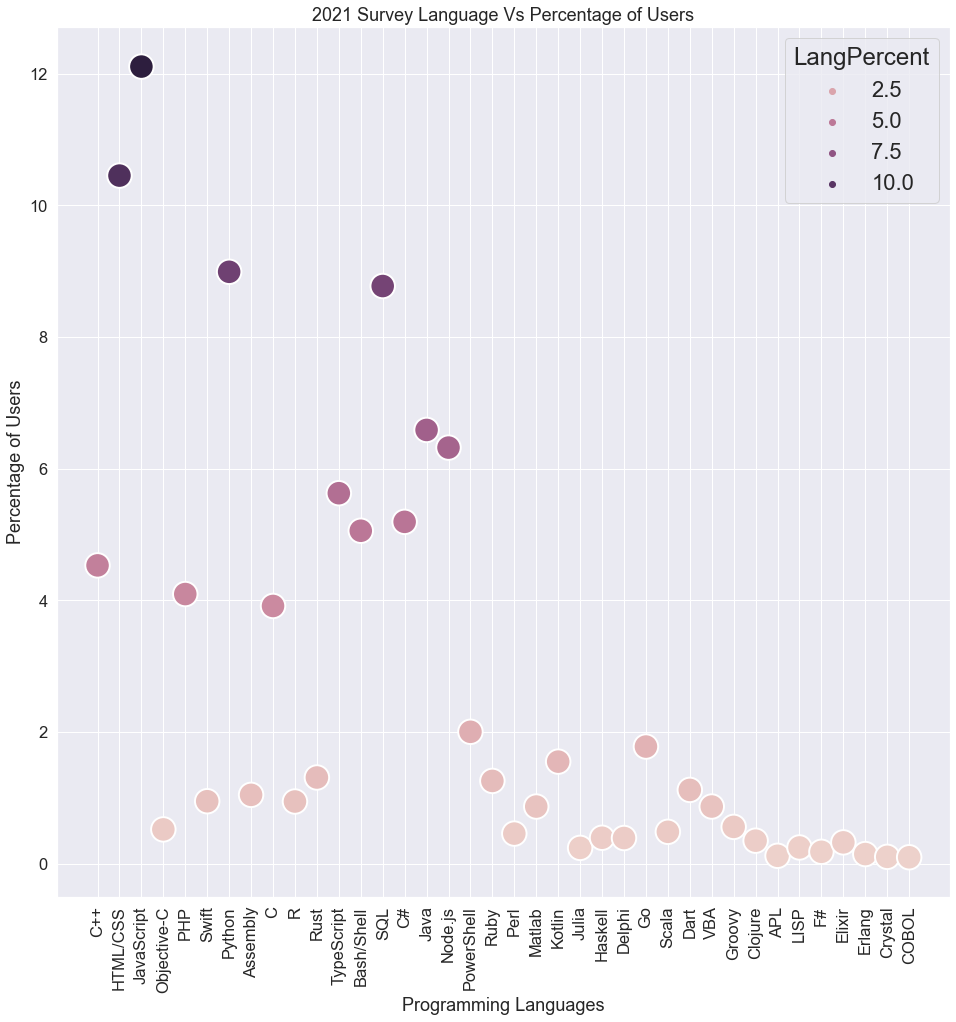

In [24]:
plt.rcParams['figure.figsize']=16,16
plt.title("2021 Survey Language Vs Percentage of Users")
sns.set(font_scale = 2.0)
plt.xticks(rotation=90)
#plt.ylim(top = 1000000)
plt.ticklabel_format(style = 'plain',axis='y')
sns.scatterplot( x="ProgrammingLanguage", y='LangPercent',s=600,hue='LangPercent',data=langCount2021df)
plt.xlabel("Programming Languages")
plt.ylabel("Percentage of Users")

Text(0, 0.5, 'Percentage of Users')

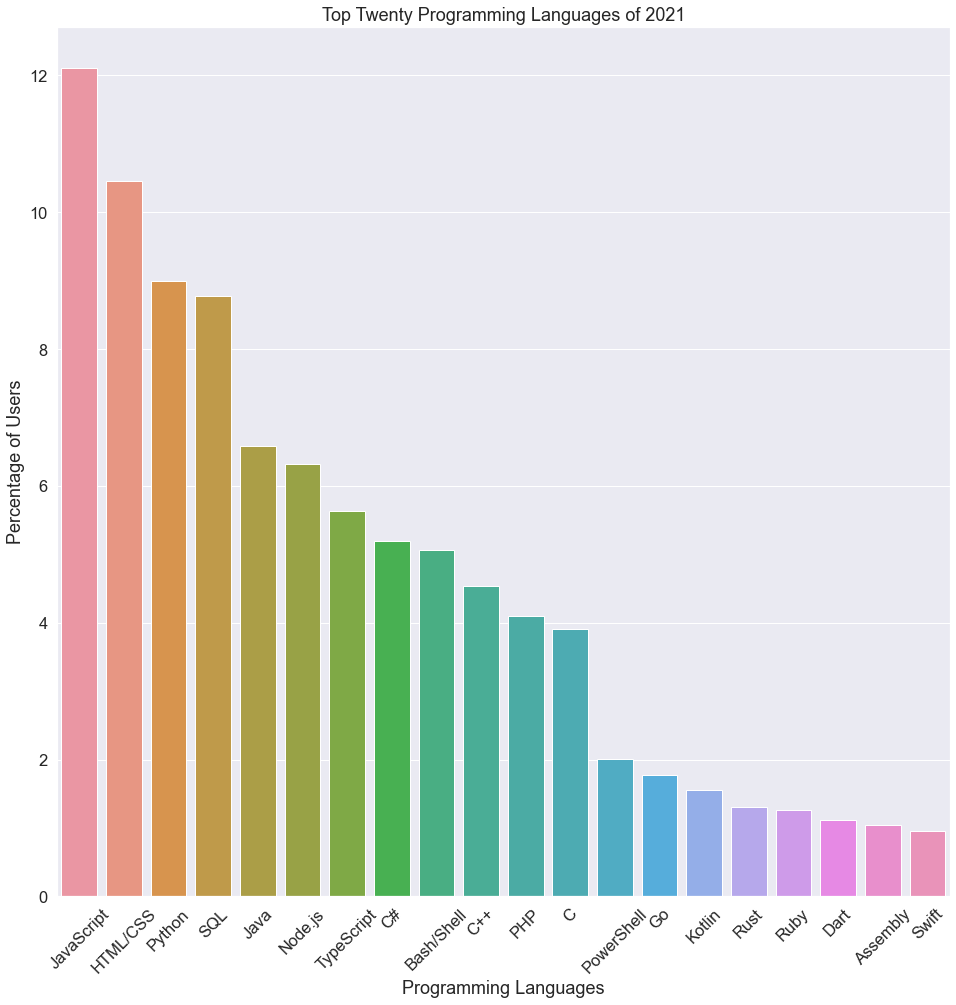

In [25]:
#plt.rcParams['figure.figsize']=16,16
sns.set(font_scale = 1.5)
plt.xticks(rotation=45)
plt.title("Top Twenty Programming Languages of 2021")
sns.barplot(data=topTwentyLangCount2021df, x="ProgrammingLanguage", y="LangPercent")
plt.xlabel("Programming Languages")
plt.ylabel("Percentage of Users")

### Analysis of above plot
- Web development languages find themselves at the top with JavaScript taking top spot and the markup language of HTML with it's style sheet language CSS. 
- Python makes it to third being more general purpose than javascript being used in web development, security, scripting and data analysis. As well as many other areas such as computer vision.
- Modern languages such as Go, Kotlin and Rust all make it into the top twenty being used. 

Text(0, 0.5, 'Percent of Users')

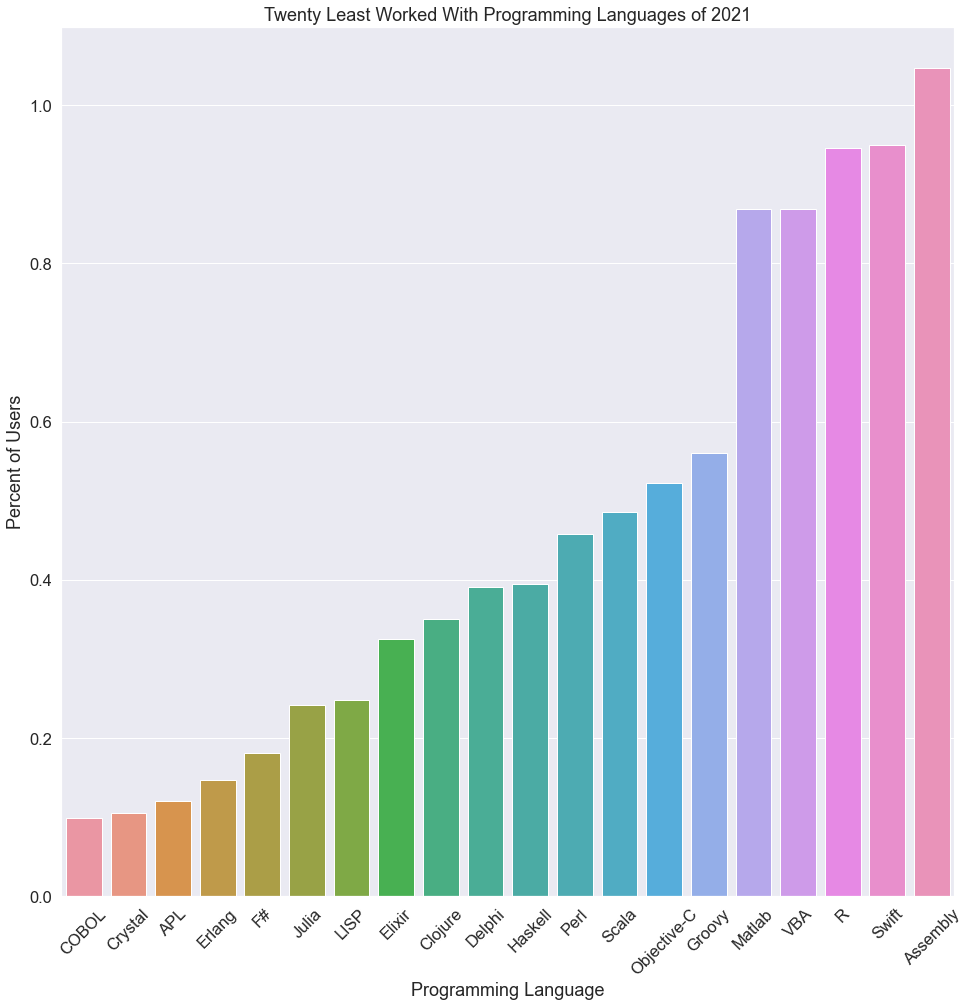

In [26]:
sns.set(font_scale = 1.5)

plt.xticks(rotation=45)
plt.title("Twenty Least Worked With Programming Languages of 2021")
sns.barplot(data=lowTwentyLangCount2021df, x="ProgrammingLanguage", y="LangPercent")
plt.xlabel("Programming Language")
plt.ylabel("Percent of Users")

### Analysis of above plot
- Interestingly many of languages in the bottom twenty are functional languages such as Haskell, Erlang, Elixir and Clojure. Or heavily support function programming such as Groovy and Scala.

In [27]:
#some strange values entered for compensation so used z scores, and got data within
# 3 std deviations of the mean with scipy.stats

from scipy.stats import zscore
dfComp = df2021P[['YearsCodePro','ConvertedCompYearly']].copy().dropna().rename(columns={'YearsCodePro':'Years Experience','ConvertedCompYearly':'Compensation'}).sort_values(by=['Years Experience']).round()
zScores = zscore(dfComp['Compensation'])
absZScores = np.abs(zScores)
filteredSalaries = (absZScores < 3)
dfCompFiltered = dfComp[filteredSalaries]
dfCompFinal = dfCompFiltered.apply(pd.to_numeric , errors = 'coerce').dropna()
dfCompFinal.describe().round()

,Years Experience,Compensation
count,44202.0,44202.0
mean,9.0,89732.0
std,8.0,142466.0
min,1.0,1.0
25%,4.0,28536.0
50%,7.0,58167.0
75%,13.0,100000.0
max,50.0,1704000.0


<AxesSubplot:title={'center':'Compensation Density'}, xlabel='Compensation', ylabel='Density'>

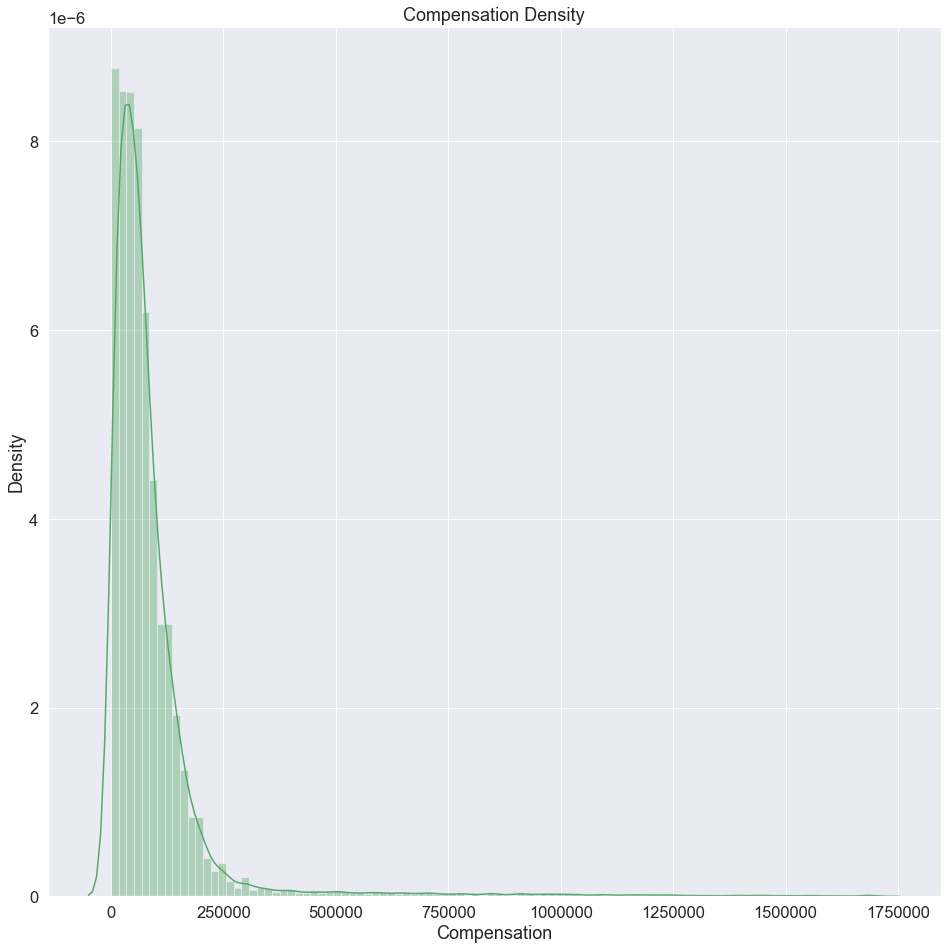

In [28]:
#ignore the future deprecation for now
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
plt.title("Compensation Density")
plt.ticklabel_format(style = 'plain',axis='x')
sns.distplot(dfCompFinal['Compensation'], color='g', bins=100, hist_kws={'alpha': 0.4})



# Beginning Exploratory Data Analysis for Research Questions
## Task 4
- Plotting column data against eachother now such as programming language vs. mean salary. To begin to answer 
 if the popularity of a language correlates with salary.
- Salary against years of experience. 

In [29]:
dfLangSalary2021 = dfLangSalary2021.reindex(dfLangSalary2021.mean().sort_values().index,axis=1)

dfLangSalary2021.head()

index,Dart,Matlab,PHP,Delphi,VBA,R,HTML/CSS,C,JavaScript,Java,...,Swift,Perl,Go,Rust,Ruby,Clojure,Erlang,Elixir,LISP,APL
0,NaN,NaN,62268.0,37752.0,25944.0,NaN,62268.0,NaN,62268.0,NaN,...,62268.0,77290.0,122580.0,NaN,NaN,61398.0,155111.0,59454.0,NaN,NaN
1,45564.0,11832.0,NaN,45564.0,NaN,NaN,NaN,NaN,NaN,77290.0,...,NaN,NaN,300000.0,103000.0,77290.0,518868.0,NaN,90000.0,58373.0,155111.0
2,NaN,NaN,46135.0,59454.0,130000.0,NaN,NaN,77290.0,NaN,17748.0,...,NaN,NaN,NaN,NaN,46135.0,NaN,190000.0,NaN,NaN,NaN
3,42336.0,25944.0,NaN,16704.0,71850.0,NaN,NaN,NaN,NaN,NaN,...,45564.0,115000.0,45564.0,NaN,NaN,NaN,NaN,175000.0,175000.0,NaN
4,151337.0,100000.0,NaN,NaN,14268.0,NaN,NaN,NaN,NaN,77831.0,...,NaN,NaN,21620.0,NaN,115784.0,NaN,134430.0,190000.0,54049.0,NaN


Text(0, 0.5, 'Mean Salary')

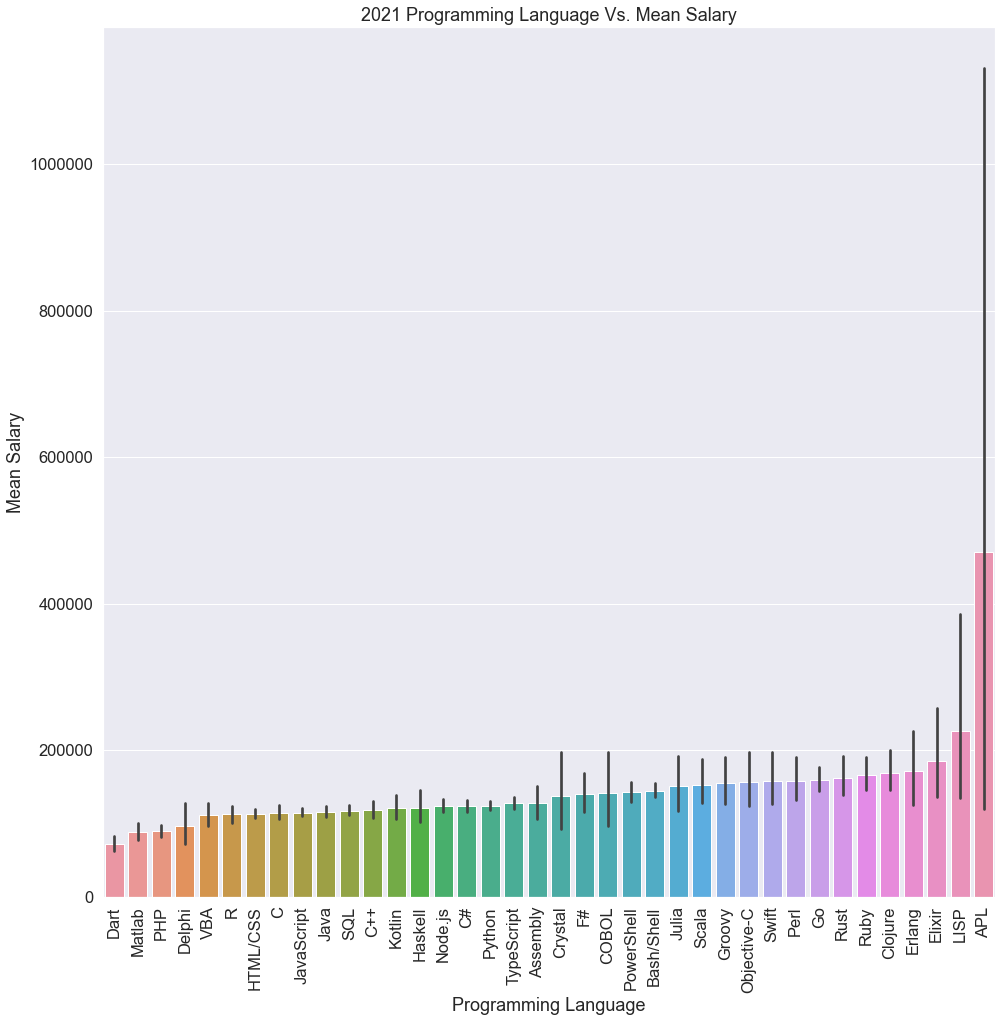

In [30]:
sns.set(font_scale = 1.5)
plt.xticks(rotation=90)
plt.title("2021 Programming Language Vs. Mean Salary")
sns.barplot(data=dfLangSalary2021)

plt.ticklabel_format(style = 'plain',axis='y')
plt.xlabel("Programming Language")
plt.ylabel("Mean Salary")

In [31]:
print(f"Max entered salary of APL language: {dfLangSalary2021['APL'].max()}")
print(f"Standard deviation of APL language:{round(dfLangSalary2021['APL'].std(),2)}")

Max entered salary of APL language: 45241312.0
Standard deviation of APL language:3612908.16


Dropping the language column APL in the graph to get a more naunced look.

Text(0, 0.5, 'Mean Salary')

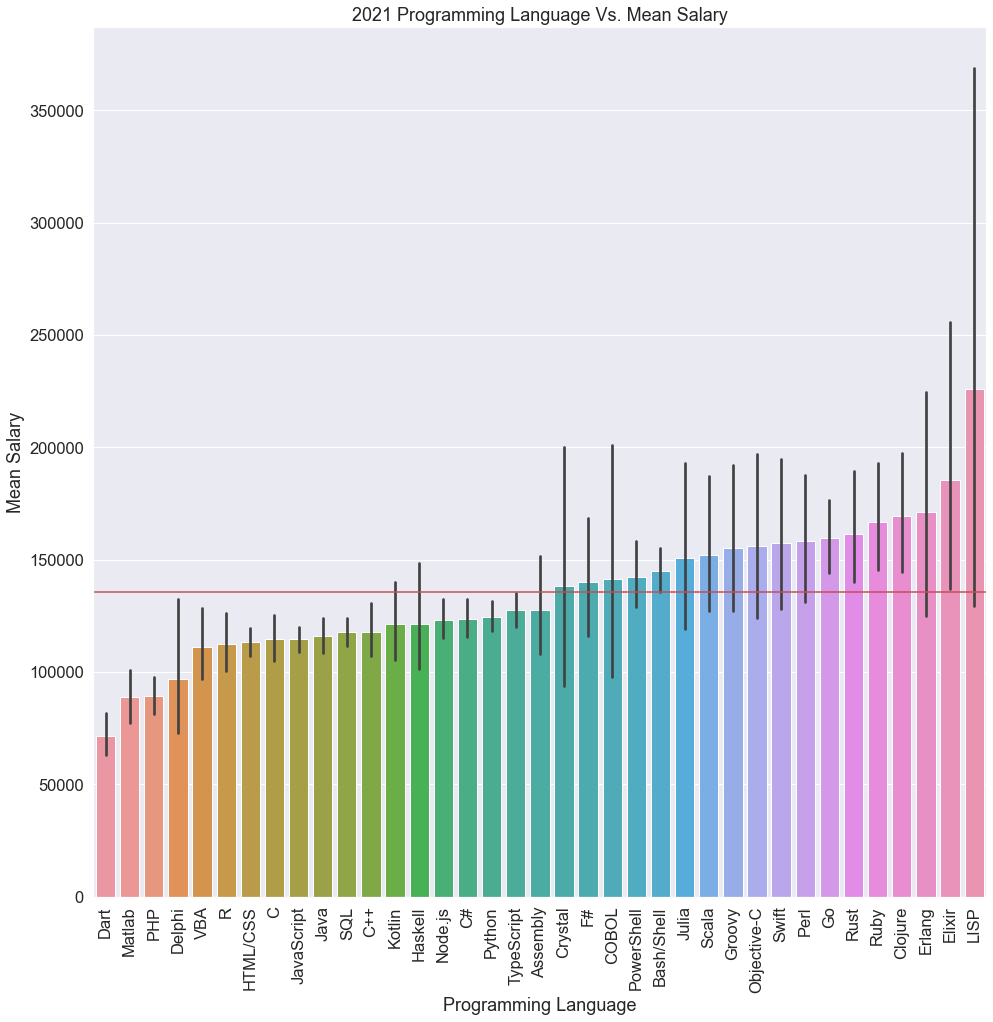

In [32]:
dfLangSalary2021=dfLangSalary2021.drop(columns= ['APL'])
sns.set(font_scale = 1.5)
plt.xticks(rotation=90)
plt.title("2021 Programming Language Vs. Mean Salary")
sns.barplot(data=dfLangSalary2021)

plt.ticklabel_format(style = 'plain',axis='y')
plt.axhline(dfLangSalary2021.mean().mean(),color='r') #mean line
plt.xlabel("Programming Language")
plt.ylabel("Mean Salary")

### Analysis of Above Two Plots (With And Without APL)

- Clearly many surveyed who use the language APL a quite niche and rarely used language from the above plots have widely differing salary answers. With probable lying responses as indicated below by the max entered value and standard deviation.

- Many of the lesser used languages fair quite well or better than the mean line shown in read. Languages found in the lesser used were Groovy,Lisp,Elixir and Clojure.

- A caveat to this is the survey doesn't indicate whether the respondees are using the language for work or hobby/side project.

Text(0, 0.5, 'Mean Salary of Language')

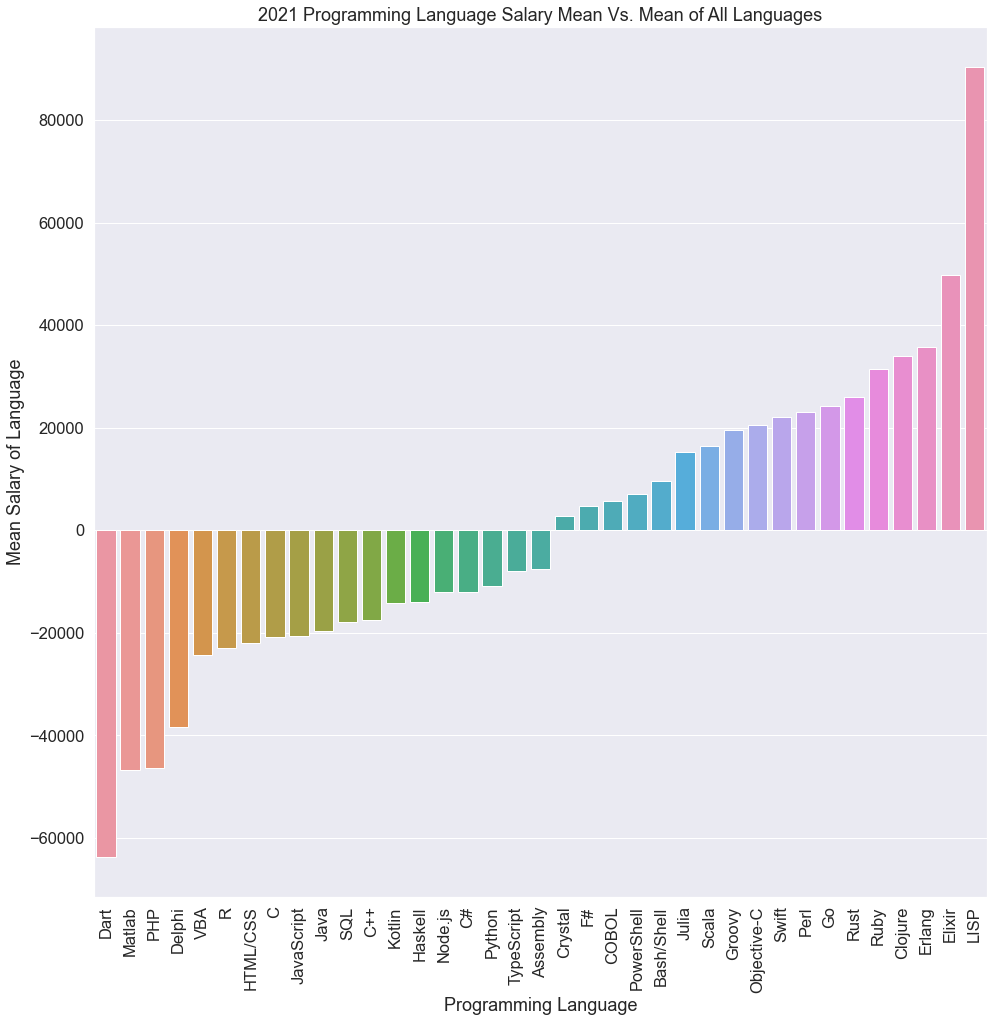

In [34]:
meanDiffLang2021Df = p1.dfLangSalaryMean(dfLangSalary2021)
sns.set(font_scale = 1.5)
plt.xticks(rotation=90)
plt.title("2021 Programming Language Salary Mean Vs. Mean of All Languages")
sns.barplot(data=meanDiffLang2021Df)
plt.ticklabel_format(style = 'plain',axis='y')
plt.xlabel("Programming Language")
plt.ylabel("Mean Salary of Language")

<AxesSubplot:title={'center':'Compensation Versus Years Experience'}, xlabel='Years Experience', ylabel='Compensation'>

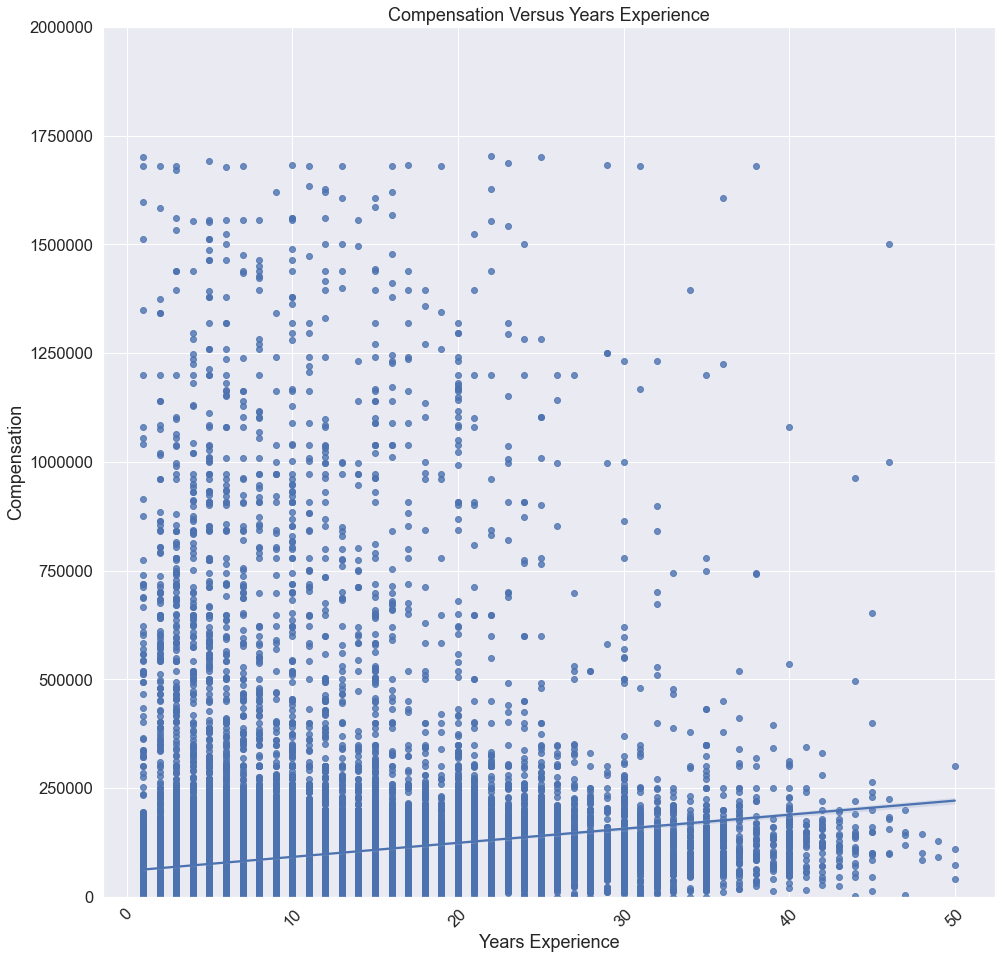

In [35]:
plt.title("Compensation Versus Years Experience")
plt.xticks(rotation=45)
plt.ylim(top = 2000000)
plt.ticklabel_format(style = 'plain',axis='y')
sns.regplot( x="Years Experience", y='Compensation',data=dfCompFinal)

In [ ]:
#https://www.python-graph-gallery.com/ridgeline-graph-seaborn

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

'''
# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month # we store the month in a separate column

# we define a dictionnary with months that we'll use later
month_dict = {1: 'lang1',
              2: 'lang2',
              3: 'lang3',
              4: 'lang4',
              5: 'lang5',
              6: 'lang6',
              7: 'lang7',
              8: 'lang8',
              9: 'lang9',
              10: 'lang10',
              11: 'lang11',
              12: 'lang12',
              13:'lang13'}
'''
# we create a 'month' column
temp['month'] = temp['month'].map(month_dict)
#my programming lang columns
# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
langMeanSalary = dfLangSalary2021.mean().mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=13)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean_TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()